![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Defect detection in aluminum wheels

Reference:

Mery, D. [Aluminum Casting Inspection Using Deep Learning: A Method Based on Convolutional Neural Networks](https://link.springer.com/article/10.1007/s10921-020-0655-9). J Nondestruct Eval 39, 12 (2020).

In [ ]:
!wget https://www.dropbox.com/s/sfgepqqql178xzc/castings_32x32.zip
!unzip -qq castings_32x32

--2023-07-19 13:17:12--  https://www.dropbox.com/s/sfgepqqql178xzc/castings_32x32.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/sfgepqqql178xzc/castings_32x32.zip [following]
--2023-07-19 13:17:12--  https://www.dropbox.com/s/raw/sfgepqqql178xzc/castings_32x32.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2631644cf7eba176d0502fd6d9.dl.dropboxusercontent.com/cd/0/inline/CAIkAnF3wKJWHOvvwVeStBJiG2oHfKBn6DiUIKOzMM4svuTpj1RVVSM4LUxIoV4Ud192n2UoExO6y6PSfJjtS3eHc3pTvZMYtxwdpSo5dL7YEdnnjjm8XeLC7vZCXbK_bjopOTLg10kp1_syo2pOvsf12iHsLISd6OgpvpzrOFsGRw/file# [following]
--2023-07-19 13:17:13--  https://uc2631644cf7eba176d0502fd6d9.dl.dropboxusercontent.com/cd/0/inline/CAIkAnF3wKJWHOvvwVeStBJiG2oHfKBn6DiUIKOzMM4svuTpj1RVVSM4LUxIoV

In [ ]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train and test data directory
train_dir = "castings/train"
test_dir  = "castings/test"


#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 32, 32])
   Classes:  ['class_0', 'class_1']


In [ ]:
!wget https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
from cnn_utils import *
print('cnn_utils module has been loaded')

--2023-07-19 13:17:27--  https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2q224dslxdiag7i/cnn_utils.py [following]
--2023-07-19 13:17:27--  https://www.dropbox.com/s/raw/2q224dslxdiag7i/cnn_utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1af09df12b73ef350789653bdc.dl.dropboxusercontent.com/cd/0/inline/CALva0kGYUOE4E0ah-W5XKz_HapOqYtXTz8BfoNmM0sG7GURtvi8pDFWjI9MiizR53HxYNSwDpjHfp-V_EejY0Uehlw7mh-qRqBSL1sCQvLtLxh58gPsa6fCiAY7ksJTG6IqNJTJHXqGvTSNwqAfIu1w8MWX-tGzsfDrjTwPpkntKA/file# [following]
--2023-07-19 13:17:28--  https://uc1af09df12b73ef350789653bdc.dl.dropboxusercontent.com/cd/0/inline/CALva0kGYUOE4E0ah-W5XKz_HapOqYtXTz8BfoNmM0sG7GURtvi8pDFWjI9MiizR53HxYNSwDpjHfp-V

Image: 1535, Label : class_1


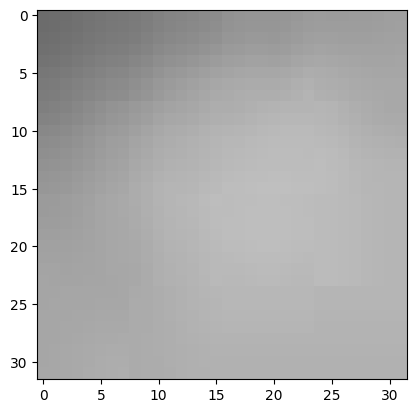

In [ ]:
#display an image in the training dataset
display_img(train_set,1535)

In [ ]:
#load the train and validation into batches.

batch_size = 50
val_size = 200 # 2000
train_size = len(train_set) - val_size

train_data,val_data = random_split(train_set,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)


Length of Train Data : 2054
Length of Validation Data : 200


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


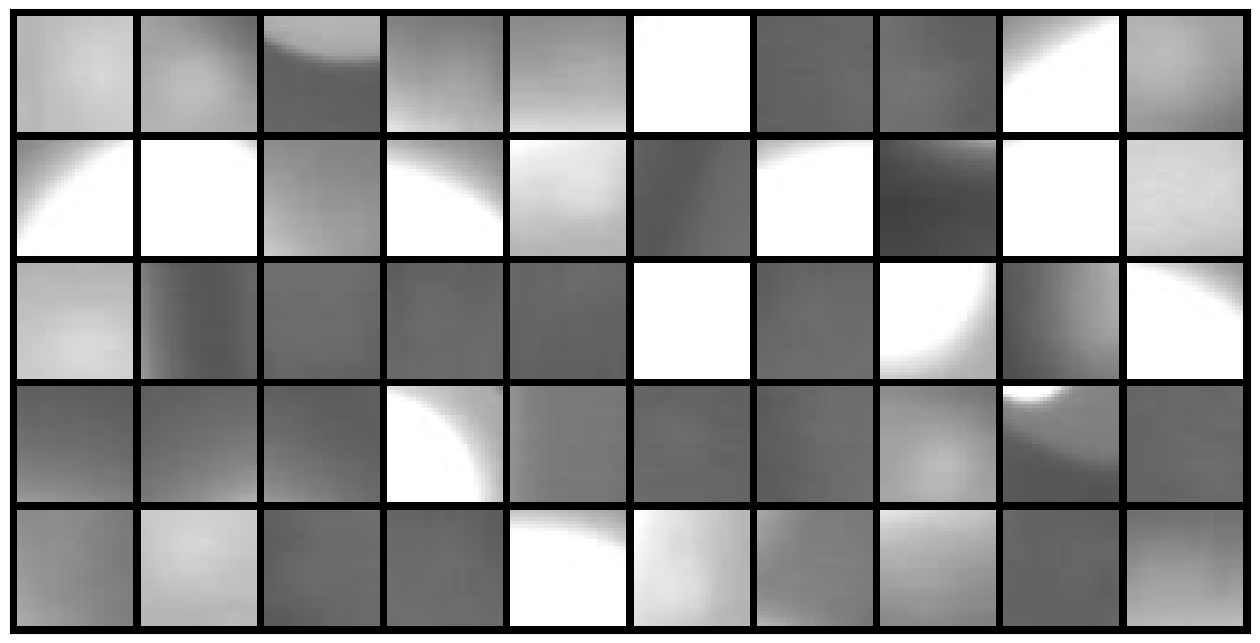

In [ ]:
show_batch(train_dl,nrow=10)

In [ ]:
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32 ,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64, 64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(64,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(2048,512),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64,2)
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=2048, out_features=512, bias=True)
    (17): Linear(in_features=512, out_feature

In [ ]:
#fitting the model on training data and record the result after each epoch
num_epochs = 200
opt_func   = torch.optim.Adam
lr         =  0.00075
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.6274      0.6780      0.5400    ***      12.1 
    1      0.5316      0.5332      0.7050    ***      11.9 
    2      0.5580      0.4976      0.7650    ***      12.0 
    3      0.4937      0.4615      0.7700    ***      11.8 
    4      0.4933      0.5924      0.7050             11.6 
    5      0.4409      1.0600      0.5650             12.1 
    6      0.7165      0.6500      0.6050             12.0 
    7      0.5260      0.4519      0.7800    ***      11.8 
    8      0.4158      0.3927      0.8400    ***      11.8 
    9      0.3843      0.4043      0.8150             11.9 
   10      0.4414      0.4235      0.7900             11.4 
   11      0.3783      0.4325      0.7950             10.7 
   12      0.3780      0.8003      0.5650             11.9 
   13      0.5796      0.5067      0.7950             11.9 
   14      0.4356      0.6553 

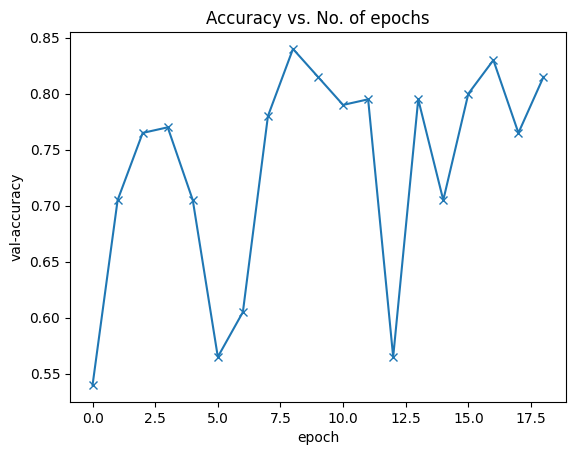

In [ ]:
plot_accuracies(history)

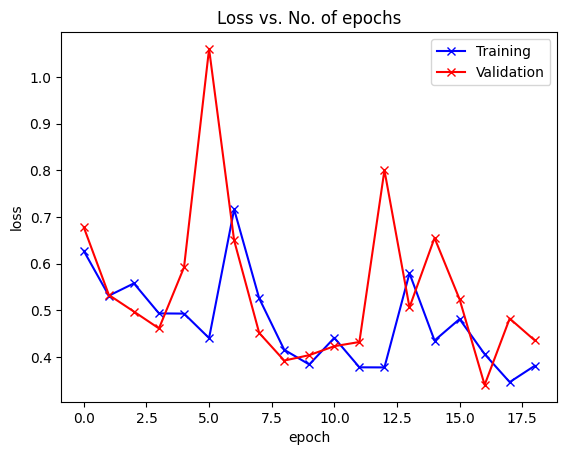

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.8202846975088968
 
Confusion Matrix = 
[[208  73]
 [ 28 253]]


In [ ]:
C1,acc1 = performance(model,train_data,'Training')
C2,acc2 = performance(model,val_data,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[779 248]
 [ 94 933]]
 
Training Accuracy = 0.8335
 
Validation Confusion Matrix = 
[[74 26]
 [ 6 94]]
 
Validation Accuracy = 0.8400
 
Testing Confusion Matrix = 
[[208  73]
 [ 28 253]]
 
Testing Accuracy = 0.8203
 
